# First steps in data exploration
> Ideas on how to start with a new data set

- toc: true
- branch: master
- badges: true
- comments: true
- author: Konrad Wölms
- categories: [first steps, python, jupyter]

In [1]:
import requests
import os
data_url = 'http://www.berlin.de/sen/finanzen/dokumentendownload/haushalt/haushaltsplan-/haushaltsplan-2018-2019/20180125_dhh18_19.csv'
file = 'berlin_budget.csv'
if not os.path.exists(file):
    with open(file, 'wb') as file:
        resp = requests.get(data_url)
        file.write(resp.content)

For sharing more complex data analyses on fastPages, a step like this might not be very
interesting to the ready and might quite likely be hidden by starting the cell with `#hide`.

## Small nuisance when loading data

Now even with a `.csv` file locally present the are a few annoying errors that that might prevent somebody from simply importing. What we would all like to to do, is to simply call `pd.read_csv('berlin_budget.csv')`


### Encoding

This is probably one of the most annoying data aspects that data scientists sometimes have to deal with. Unfortunately when encoding errors occur one has to deal with them, and manually inspecting the data files in a text editor or excel, generally does not help loading them into python. In practical terms most files today are encoded in what is called `UTF-8`, and that is the standard that python applications assume. The good thing is most functions that deal with files, like `open` or `pd.read_csv` let you specify the encoding. Unfortunately it can be overwhelming what to pick when confronted with this issue for the first time. Legacy windows applications, which have been and probably still are present in many public institutions and agencies, used different encodings. Most commonly (for western files) an encoding called `CP1252` was used. Therefore we will also specify this encoding when reading in the data.

> Tip: When you get encoding errors for files using Latin characters, try CP1252.

### Separator

The next issue with this file is the separator, which is actually not `,`. In the best cases one can still read in the files and then realize this later on. Sometimes this can fail, however. As is the case with our budget data set. In such a case the file needs to be either inspected to find the right separator, or common separators can simply be tried (for instance `[',',';','\t']`). In this case `;` lets us load the data, which is a typical separator for `.csv` files in Germany.

### Number formatting

While being annoying as well number formatting usually does not prevent one from loading data, but simply making manipulating it more difficult. Here we again set the typical German values `decimal = ','` and `thousands = '.'`.

In [2]:
import pandas as pd
berlin_budget_raw = pd.read_csv('berlin_budget.csv', sep=';', decimal=',', thousands='.', encoding='CP1252')

## First steps with raw data

Now that we have imported the raw data we'll go through some typical starting points. These
are 
- checking the shape
- looking at example rows
- looking at the data types
- checking for missing data
- check different values for discrete variables

### Shape

A first helpful thing is usually, to look at the shape of the data with `berlin_budget_raw.shape`. For this data set it shows that we have 20828 rows and 25 columns. This means that there are more rows, than we can look at manually and there are more columns than we can conveniently look it. This is often the case and the data was chosen as an example of how to deal with this. The strategy to deal with the rows, is to use function that help us analyze the entire content to get an impression. The strategy for the columns is to use additional information we find to exclude as many columns as possible for initial analyses, to make the data easier to handle.

In [3]:
#hide
berlin_budget_raw.shape

(20828, 25)

### Example rows

There are several methods to get sample rows of a dataframe. The most typical ones in pandas are `.head`, `.tail` and `.sample`, which return the first 5 rows, last 5 rows or a random 5 rows on a call.

In [4]:
berlin_budget_raw.head()

Typ        Bezeichnung  Bereich Bereichsbezeichnung  Einzelplan  \
0  2.0  Verfassungsorgane     30.0     Hauptverwaltung         1.0   
1  2.0  Verfassungsorgane     30.0     Hauptverwaltung         1.0   
2  2.0  Verfassungsorgane     30.0     Hauptverwaltung         1.0   
3  2.0  Verfassungsorgane     30.0     Hauptverwaltung         1.0   
4  2.0  Verfassungsorgane     30.0     Hauptverwaltung         1.0   

  Einzelplanbezeichnung  Kapitel Kapitelbezeichnung  Hauptgruppe  \
0      Abgeordnetenhaus    100.0   Abgeordnetenhaus          1.0   
1      Abgeordnetenhaus    100.0   Abgeordnetenhaus          1.0   
2      Abgeordnetenhaus    100.0   Abgeordnetenhaus          1.0   
3      Abgeordnetenhaus    100.0   Abgeordnetenhaus          1.0   
4      Abgeordnetenhaus    100.0   Abgeordnetenhaus          1.0   

                             Hauptgruppenbezeichnung  ...  \
0  Verwaltungseinnahmen, Einnahmen aus Schuldendi...  ...   
1  Verwaltungseinnahmen, Einnahmen aus Schuldendi...  ...   
2  Verwaltungseinnahmen, Einnahmen aus Schuldendi...  ...   
3  Verwaltungseinnahmen, Einnahmen aus Schuldendi...  ...   
4  Verwaltungseinnahmen, Einnahmen aus Schuldendi...  ...   

   Hauptfunktionsbezeichnung Oberfunktion  \
0         Allgemeine Dienste          1.0   
1         Allgemeine Dienste          1.0   
2         Allgemeine Dienste          1.0   
3         Allgemeine Dienste          1.0   
4         Allgemeine Dienste          1.0   

                     Oberfunktionsbezeichnung Funktion  Funktionsbezeichnung  \
0  Politische Führung und zentrale Verwaltung     11.0    Politische Führung   
1  Politische Führung und zentrale Verwaltung     11.0    Politische Führung   
2  Politische Führung und zentrale Verwaltung     11.0    Politische Führung   
3  Politische Führung und zentrale Verwaltung     11.0    Politische Führung   
4  Politische Führung und zentrale Verwaltung     11.0    Politische Führung   

        Titelart    Titel                                   Titelbezeichnung  \
0  Einnahmetitel  11201.0  Geldstrafen, Geldbußen, Verwarnungs- und Zwang...   
1  Einnahmetitel  11906.0                       Ersatz von Fernmeldegebühren   
2  Einnahmetitel  11961.0                      Erstattung von Steuerbeträgen   
3  Einnahmetitel  11979.0                             Verschiedene Einnahmen   
4  Einnahmetitel  12401.0          Mieten für Grundstücke, Gebäude und Räume   

   Ansatz 2018 in € Ansatz 2019 in €  
0            1000.0           1000.0  
1            1000.0           1000.0  
2            1000.0           1000.0  
3           10000.0          10000.0  
4           45000.0          45000.0  

[5 rows x 25 columns]

The first 5 rows show us many numeric and string columns and show that repeating string columns seem to coincide with repeating numeric columns.

### Data types

It often helps to look at the data types of the data frame using `berlin_budget_raw.dtypes`. We find

In [5]:
#collapse-output
berlin_budget_raw.dtypes

Typ                          float64
Bezeichnung                   object
Bereich                      float64
Bereichsbezeichnung           object
Einzelplan                   float64
Einzelplanbezeichnung         object
Kapitel                      float64
Kapitelbezeichnung            object
Hauptgruppe                  float64
Hauptgruppenbezeichnung       object
Obergruppe                   float64
Obergruppenbezeichnung        object
Gruppe                       float64
Gruppenbezeichnung            object
Hauptfunktion                float64
Hauptfunktionsbezeichnung     object
Oberfunktion                 float64
Oberfunktionsbezeichnung      object
Funktion                     float64
Funktionsbezeichnung          object
Titelart                      object
Titel                        float64
Titelbezeichnung              object
Ansatz 2018 in €             float64
Ansatz 2019 in €             float64
dtype: object

This shows again that many columns with similar names come as a float column together with another object (string) column. We can also see that there are two columns containing €, which are likely to contain the actual budget data. This already suggest the following strategy for reducing the columns. For each pair of columns that seem to belong together, we might be able to drop one of the two for initial analyses. For the budget column, it is probably a good idea to start with only one of them.

> Warning: Data types might be wrong if there were any problems or ambiguities when reading in a file. When in doubt columns with an object (string) data type should be inspected manually to check whether they really contain text.

### Missing values

Missing data can cause all sorts of issues. And it is a good idea to check for missing data and deal with it. One of the easiest checks is the following, which is a trick based on the ability to sum boolean values.

In [6]:
#collapse-output
berlin_budget_raw.isna().sum()

Typ                          1
Bezeichnung                  1
Bereich                      1
Bereichsbezeichnung          1
Einzelplan                   1
Einzelplanbezeichnung        1
Kapitel                      1
Kapitelbezeichnung           1
Hauptgruppe                  1
Hauptgruppenbezeichnung      1
Obergruppe                   1
Obergruppenbezeichnung       1
Gruppe                       1
Gruppenbezeichnung           1
Hauptfunktion                1
Hauptfunktionsbezeichnung    1
Oberfunktion                 1
Oberfunktionsbezeichnung     1
Funktion                     1
Funktionsbezeichnung         1
Titelart                     1
Titel                        1
Titelbezeichnung             1
Ansatz 2018 in €             1
Ansatz 2019 in €             1
dtype: int64

This shows that there is exactly one missing value for each row, which is not too bad. Additionally it suggests, that there is probably an empty row, instead of randomly missing data. And true enough, if we were to check `berlin_budget_raw.tail()` we would see that every value in the last row is missing. Such cases are easy to deal with, because we can just drop that row.

### Different values
One of the most useful approaches to get an impression of categorical data is to count how many different values are in a columns. The build in `.nunique()` method in pandas does exactly this. To get a little more structure into it, it helps to sort the results right away.

In [7]:
#collapse-output
berlin_budget_raw.nunique().sort_values()

Titelart                        2
Typ                             3
Bezeichnung                     3
Hauptfunktionsbezeichnung       9
Hauptfunktion                   9
Hauptgruppenbezeichnung        10
Hauptgruppe                    10
Bereichsbezeichnung            13
Bereich                        13
Einzelplan                     31
Einzelplanbezeichnung          31
Obergruppenbezeichnung         49
Oberfunktionsbezeichnung       50
Oberfunktion                   52
Obergruppe                     58
Funktionsbezeichnung          138
Funktion                      138
Gruppenbezeichnung            150
Gruppe                        173
Kapitelbezeichnung            284
Kapitel                       285
Titel                        1739
Titelbezeichnung             1925
Ansatz 2018 in €             3444
Ansatz 2019 in €             3449
dtype: int64

There are many interesting information here. First of all `Titelart` only has two different values. For budget data this means that it is a good candidate to indicate whether something is an expense or a funding source. Furthermore many of the categories with similar names have very similar distinct value counts, supporting our earlier strategy idea of only using one of the in first analyses. We also see that some categories have only a small number of different values. These are more suited for initial analyses, because they keep it simple and allow an easy inspection of aggregated data, as will be illustrated below.

> Tip: When calculating several column based quantites `pd.concat` can help to summarize them.

In [8]:
#collapse-hide
#collapse-output
pd.concat(
    [
     berlin_budget_raw.dtypes.rename('dtypes'),
     berlin_budget_raw.isna().sum().rename('missing'),
     berlin_budget_raw.nunique().rename('distinct_values')
    ]
    ,axis=1
).sort_values('distinct_values')

dtypes  missing  distinct_values
Titelart                    object        1                2
Typ                        float64        1                3
Bezeichnung                 object        1                3
Hauptfunktionsbezeichnung   object        1                9
Hauptfunktion              float64        1                9
Hauptgruppenbezeichnung     object        1               10
Hauptgruppe                float64        1               10
Bereichsbezeichnung         object        1               13
Bereich                    float64        1               13
Einzelplan                 float64        1               31
Einzelplanbezeichnung       object        1               31
Obergruppenbezeichnung      object        1               49
Oberfunktionsbezeichnung    object        1               50
Oberfunktion               float64        1               52
Obergruppe                 float64        1               58
Funktionsbezeichnung        object        1              138
Funktion                   float64        1              138
Gruppenbezeichnung          object        1              150
Gruppe                     float64        1              173
Kapitelbezeichnung          object        1              284
Kapitel                    float64        1              285
Titel                      float64        1             1739
Titelbezeichnung            object        1             1925
Ansatz 2018 in €           float64        1             3444
Ansatz 2019 in €           float64        1             3449

## Simplified Data

With the analyses above we create the following simplified data as follows.

1. We only keep categorical columns with a small number of values (<=13)
2. We only keep the string version of the categorical category
3. We only keep the 2018 budget column
4. We drop the missing data

We store results in `berlin_budget` and have a look at some samples.

In [9]:
#hide
retained_columns = ['Titelart','Bezeichnung','Hauptfunktionsbezeichnung','Hauptgruppenbezeichnung','Bereichsbezeichnung','Ansatz 2018 in €']
berlin_budget = berlin_budget_raw.loc[:,retained_columns].dropna()

In [10]:
berlin_budget.sample(5)

Titelart         Bezeichnung  \
8616   Einnahmetitel             Bezirke   
9789   Einnahmetitel             Bezirke   
19183   Ausgabetitel             Bezirke   
1344    Ausgabetitel  Senatsverwaltungen   
8132    Ausgabetitel             Bezirke   

                               Hauptfunktionsbezeichnung  \
8616   Soziale Sicherung, Familie und Jugend, Arbeits...   
9789   Soziale Sicherung, Familie und Jugend, Arbeits...   
19183  Soziale Sicherung, Familie und Jugend, Arbeits...   
1344   Soziale Sicherung, Familie und Jugend, Arbeits...   
8132   Bildungswesen, Wissenschaft, Forschung, kultur...   

                                 Hauptgruppenbezeichnung  \
8616   Einnahmen aus Zuweisungen und Zuschüssen mit A...   
9789   Einnahmen aus Zuweisungen und Zuschüssen mit A...   
19183  Ausgaben für Zuweisungen und Zuschüsse mit Aus...   
1344   Ausgaben für Zuweisungen und Zuschüsse mit Aus...   
8132                                    Personalausgaben   

            Bereichsbezeichnung  Ansatz 2018 in €  
8616   Friedrichshain-Kreuzberg            1000.0  
9789                     Pankow            1000.0  
19183               Lichtenberg            1000.0  
1344            Hauptverwaltung          490000.0  
8132   Friedrichshain-Kreuzberg          182000.0

This already simplified the data a lot and brought it down from 25 to 6 columns!. At this point one can more easily get started with more concrete analyses. In This post we restrict ourselves to two simple examples. A consistency check regarding the budget's spending and funding. And a simple overview plot about different spending.

### Budget Consistency

We've already pointed out that `Titleart` is a good distinguish expenses and funding sources. Such a hypotheses can easily be checked with the data.

In [11]:
berlin_budget.groupby('Titelart')['Ansatz 2018 in €'].sum()

Titelart
Ausgabetitel     2.860320e+10
Einnahmetitel    2.860320e+10
Name: Ansatz 2018 in €, dtype: float64

This works out. With a little bit of domain knowledge about Berlin itself we realized that the column `Bereichsbezeichung` contains mostly the different districts of Berlin. So a reasonable followup check is to do the same analysis on a district level. This also works out.

In [12]:
#collapse-hide
berlin_budget.groupby(['Bereichsbezeichnung','Titelart'])['Ansatz 2018 in €'].sum().unstack()

Titelart                    Ausgabetitel  Einnahmetitel
Bereichsbezeichnung                                    
Charlottenburg-Wilmersdorf  7.046985e+08   7.046985e+08
Friedrichshain-Kreuzberg    7.189672e+08   7.189672e+08
Hauptverwaltung             1.947634e+10   1.947634e+10
Lichtenberg                 8.912989e+08   8.912989e+08
Marzahn-Hellersdorf         6.990315e+08   6.990315e+08
Mitte                       1.026627e+09   1.026627e+09
Neukölln                    9.115210e+08   9.115210e+08
Pankow                      9.365851e+08   9.365851e+08
Reinickendorf               6.343956e+08   6.343956e+08
Spandau                     6.432431e+08   6.432431e+08
Steglitz-Zehlendorf         5.855771e+08   5.855771e+08
Tempelhof-Schöneberg        7.978415e+08   7.978415e+08
Treptow-Köpenick            5.770762e+08   5.770762e+08

### First bar plots

A quantities dependence on a few categories can be nicely visualized using bar plots. This is another advantage of starting with columns containing few different elements when analyzing a new data set. As an illustration we pick `Hauptfunktionsbezeichnung` and plot spending against it. often two simple tricks help with the visualization in these cases.
1. The use of horizontal bar charts, because it makes category names easier to read.
2. Sorting the values before plotting them, which makes everything easier to compare.

In our example we get{% fn 1 %}:

In [13]:
#hide
import matplotlib.pyplot as plt
plt.style.use('seaborn')

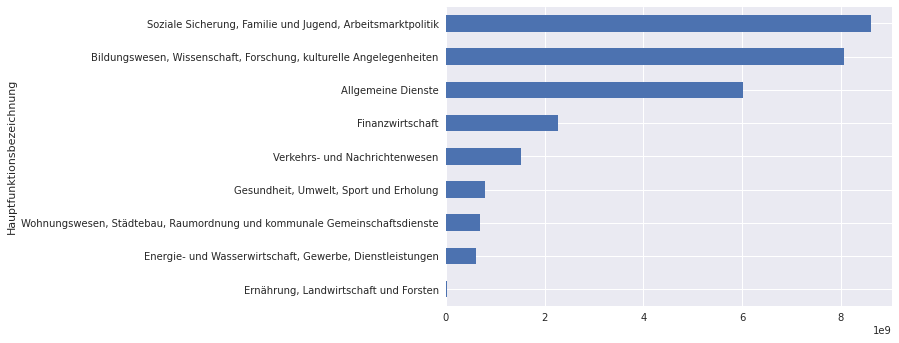

In [14]:
(
    berlin_budget
    .query('Titelart == "Ausgabetitel"')
    .groupby('Hauptfunktionsbezeichnung')['Ansatz 2018 in €'].sum()
    .sort_values()
    .plot.barh()
)

## Conclusion

This article gave a concrete example how to start tackling a real life data set. We primarily showed how to analyze and most importantly reduce the available data to get a manageable starting point. This often boils down to identifying a meaningful subset of columns that are suited for initial analysis and plots. This is particularly helpful in the absence of documentation or good domain knowledge and we hope it will hep the readers to get started with data that interests them.

{{ 'We also used a matplotlib style for prettier output inside the post.' | fndetail: 1 }}